In [1]:
import dionysus as d
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def plotBarcodes(Barcodes):
    deaths=[bar.death for i in range(0,len(dgms)) for bar in dgms[i]  if np.isfinite(bar.death)]
    births=[bar.birth for i in range(0,len(dgms)) for bar in dgms[i]  if np.isfinite(bar.birth)]
    maax=max(max(deaths,births))
    numberofbars=sum([len(Barcodes[dim]) for dim in range(0,len(Barcodes))])
    t=0.2
    cmap=plt.cm.Dark2
    colors=['tab:blue','tab:orange','tab:purple']
    for dim in range(0,min(len(Barcodes),3)):
        for bar in Barcodes[dim]:
            if bar.death==np.inf:
                bar=[bar.birth,maax+2]
            else:
                bar=[bar.birth,bar.death]
            y=(np.ones([1,2])*t)[0]
            plt.plot(bar,y,colors[dim])
            xlimits=[0, maax+2] 
            plt.xlim(xlimits)
            plt.ylim([0, max(numberofbars*0.2+0.4,4)])
            t=t+0.2

Mit Simplices in dionysus arbeiten:

In [3]:
# definieren den 2- dim simplex [0,1,2] 
s = d.Simplex([0,1,2])

In [4]:
print(s) # simplex 

<0,1,2> 0


In [5]:
len(s) # nicht gleich dim

3

In [6]:
s.dimension() #dimension

2

In [7]:
s.join(3) #du kombinierst s und vertex 3 

<0,1,2,3> 0

In [8]:
s.data # zeitpunkt der "Apperance" in der Filtrierung 

0.0

In [9]:
0 in s #was __contains__ möglich macht, ist vertex 0 beteiligt an den simplex s

True

In [10]:
for vertex in s:   # was __inter__ möglich macht 
    print(vertex)

0
1
2


In [11]:
s[0] # was __getitem__ möglich macht 

0

Eine Filtrierung definieren:

In [12]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6),([0], 1),   ([1], 2), ([0,1], 3),([0,1,2],9)]


In [13]:
f = d.Filtration()
for vertices, time in simplices:
    f.append(d.Simplex(vertices, time))
f.sort()

In [14]:
print(f)

Filtration with 7 simplices


In [15]:
for simplex in f:
    print(simplex)

<0> 1
<1> 2
<0,1> 3
<2> 4
<1,2> 5
<0,2> 6
<0,1,2> 9


In [16]:
 m = d.homology_persistence(f)

In [17]:
 dgms = d.init_diagrams(m, f)

In [18]:
 dgms

[Diagram with 3 points, Diagram with 1 points, Diagram with 0 points]

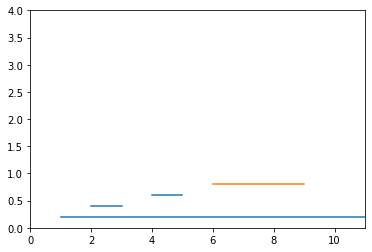

In [19]:
plotBarcodes(dgms)

Beispiel mit Netzwerk von Networkx

In [20]:
net_mise = nx.les_miserables_graph()
A = nx.adjacency_matrix(net_mise)

In [21]:
maximal_Cliques=list(nx.clique.find_cliques(net_mise ))